In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [20]:
df=pd.read_csv('../data-wrangling/suicide_unemployment_depresion.csv', index_col=0)

In [21]:
df['year']=pd.to_datetime(df['year'], format='%Y')

In [50]:
pd.set_option('display.max_rows', 50)
df['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Ecuador',
       'France', 'Greece', 'Grenada', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Panama',
       'Paraguay', 'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore', 'Spain',
       'Sri Lanka', 'Suriname', 'Thailand', 'Trinidad and Tobago',
       'United Kingdom', 'United States', 'Uruguay', 'Belize',
       'Guatemala', 'Norway', 'Saint Lucia', 'Albania', 'Finland',
       'Sweden', 'Turkmenistan', 'Ukraine', 'Guyana', 'Romania',
       'Russian Federation', 'Armenia', 'Azerbaijan', 'Belarus',
       'Czech Republic', 'El Salvador', 'Georgia', 'Germany',
       'Kazakhstan', 'Kyrgyzstan', 'Poland',

In [31]:
# Select a country to find data

def data_country(country):
    i=df.loc[df['country']==country]
    return i

In [158]:
data_country('Germany')

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
546,1990-01-01,Germany,female,4390,38943900,0.801,1764967948917,23546,6.1190,4.965477,11.272625
547,1990-01-01,Germany,male,9534,36014900,0.801,1764967948917,23546,4.0393,2.841100,26.472377
674,1991-01-01,Germany,female,4354,39141800,NaN,1861873895109,24662,6.5251,4.955636,11.123658
675,1991-01-01,Germany,male,9656,36354100,NaN,1861873895109,24662,4.4244,2.838838,26.560966
804,1992-01-01,Germany,female,4132,39361600,NaN,2123130870382,27888,8.2263,4.944267,10.497541
...,...,...,...,...,...,...,...,...,...,...,...
4227,2013-01-01,Germany,male,7456,37737465,0.915,3752513503278,48563,5.5028,2.890736,19.757554
4382,2014-01-01,Germany,female,2588,39615918,0.916,3890606893347,50167,4.6308,4.935901,6.532728
4383,2014-01-01,Germany,male,7629,37936451,0.916,3890606893347,50167,5.2835,2.888164,20.109946
4524,2015-01-01,Germany,female,2685,39783984,NaN,3375611100742,43201,4.2209,4.953054,6.748947


In [147]:
def plot_suicide_rating(country):
    fig, ax = plt.subplots(figsize=(15,10))
    #F=data_country(country).loc[data_country(country)['sex']=='female']
    #M=data_country(country).loc[data_country(country)['sex']=='male']
    #ax1.bar(F['year'],F['suicides_no'],color='r')
    #ax2.bar(M['year'],M['suicides_no'],color='b')
    ax = sns.scatterplot(x=data_country(country)['year'],
                         y=data_country(country)['suicides_no'],
                         hue=data_country(country)['sex'], data=data_country(country), style='sex')
    
    ax1 = ax.twinx() 
    
    ax1 = sns.lineplot(x=data_country(country)['year'],
                       y=data_country(country)['suicides_per_100K'],
                       hue=data_country(country)['sex'], data=data_country(country))



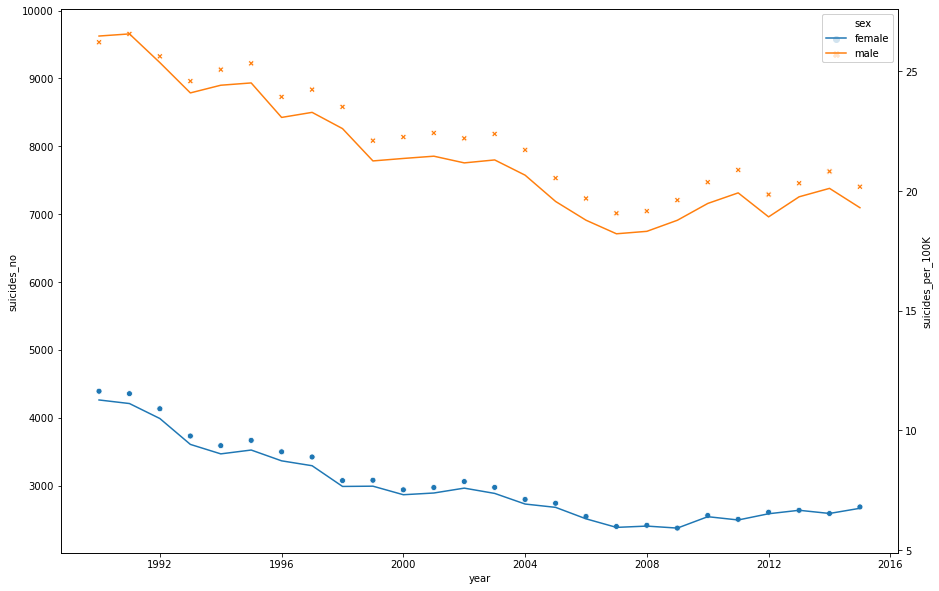

In [162]:
plot_suicide_rating('Germany')

In [142]:
def plot_suicide_variables(country):
    fig, ax = plt.subplots(figsize=(15,10))

    ax = plot.lineplot(x=data_country(country)['year'],
                         y=data_country(country)['suicides_per_100K','gdp_per_capita($)'],
                         hue=data_country(country)['sex'], data=data_country(country), style='sex')
    


KeyError: ('suicides_per_100K', 'gdp_per_capita($)')

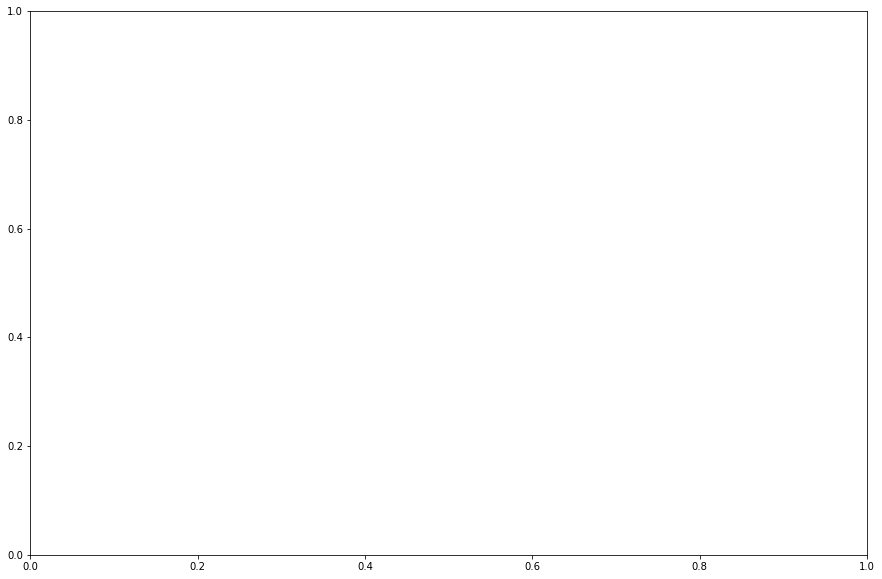

In [143]:
plot_suicide_variables('Spain')

In [156]:
#model more logical for me
#building the model and see the coeficients
# almost all the variables should have a positice effect!!
# if negative coeficcient one must ask why , negative coeficients for quality and condition and sqf dont make sense!!
def model_country(country,sex):
    df=data_country(country).loc[data_country(country)['sex']==sex]
    df = sm.add_constant(df)
    y = df['suicides_per_100K']
    X = df[[ 'const','gdp_per_capita($)','unemployment','depression_rate']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [157]:
model_country('Germany','male')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides_per_100K   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     37.25
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           8.50e-09
Time:                        15:16:14   Log-Likelihood:                -37.045
No. Observations:                  26   AIC:                             82.09
Df Residuals:                      22   BIC:                             87.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               181.6033     48.085      3.777      0.001      81.881     281.325
gdp_per_capita($) -9.103e-05   5.15e-05     -1.766      0.091      -0.000    1.59e-05
unemployment         -0.2685      0.136     -1.972      0.061      -0.551       0.014
depression_rate     -53.9493     17.518     -3.080      0.005     -90.279     -17.619
==============================================================================
Omnibus:                        0.954   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.929
Skew:                          -0.391   Prob(JB):                        0.628
Kurtosis:                       2.503   Cond. No.                     8.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""